In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model 
from sklearn import ensemble
from skimage import data
from skimage.feature import match_template
from skimage.color import rgb2gray
import cv2
import heapq
import sys

log = True

In [2]:
unicode = []
glyph_id = []

with open("unicode.txt") as file:
    lines = file.readlines()
for i in range(len(lines)):
    glyph_id.append(lines[i][42] + lines[i][44:46].lstrip('0'))
    unicode.append(lines[i][0])


In [3]:
def fix_shape(img):
    if img.shape[2] == 3:
        new_img = np.delete(img, np.arange(0, img.size, 3))
        new_img = np.delete(new_img, np.arange(0, new_img.size, 2))
        new_img.shape = (img.shape[0], img.shape[1])
    elif img.shape[2]  == 4:
        new_img = np.delete(img, np.arange(0, img.size, 2))
        new_img = np.delete(new_img, np.arange(1, new_img.size, 2))
        new_img.shape = (img.shape[0], img.shape[1])
    return new_img

In [4]:
col_dir = 'data/*.png'
col = imread_collection(col_dir)
data = []
label = []
for i in range(len(col)):
    name = col.files[i].split('_')[1].split('.')[0]   
    if name != 'UNKNOWN':
        label.append(name)
        if(col[i].ndim > 2):
            data.append(fix_shape(col[i]))
        else:
            data.append(col[i])

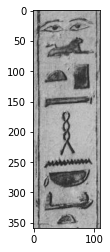

In [5]:
images = imread_collection('examples/*.jpg')
example1 = rgb2gray(images[0])
example2 = rgb2gray(images[1])
example3 = rgb2gray(images[2])
example4 = rgb2gray(images[3])
example5 = rgb2gray(images[4])
plt.imshow(example5, cmap=plt.cm.gray)

In [6]:
def check_conflict(x, y, x_list, y_list, overlap_tolerance):
    x_conflict = False
    y_conflict = False
    for xs in x_list:
        if x in range(xs-overlap_tolerance, xs+overlap_tolerance):
            x_conflict = True
    for ys in y_list:
        if y in range(ys-overlap_tolerance, ys+overlap_tolerance):
            y_conflict = True
    if((x_conflict == True) and
       (y_conflict == True)):
        return True
    else:
        return False

In [7]:
def find_glyphs(number, img, overlap_tolerance):
    
    score = []
    xs = []
    ys = []

    for i in range(len(data)):
        if log == True:
            j = (i + 1) / len(data)
            sys.stdout.write('\r')
            sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
            sys.stdout.flush()
                
        if np.any(np.less(img.shape, data[i].shape)):
            if log == True:
                sys.stdout.write("size conflic skippping hieroglyph \n")
        else:
            result = match_template(img, data[i])
            ij = np.unravel_index(np.argmax(result), result.shape)
            x, y = ij[::-1]
            score.append(result[y,x])
            xs.append(x)
            ys.append(y)
            
    best_fit = heapq.nlargest(4000, range(len(score)), key=score.__getitem__)
    
    uniqe_best_fit = []
    loc_labels = []
    loc_x = []
    loc_y = []
    j = 0
    while len(loc_labels) < number:
        conflict = check_conflict(xs[best_fit[j]], ys[best_fit[j]],
                       loc_x, loc_y, overlap_tolerance)
        if(conflict == True):
            j = j + 1
        else:
            loc_labels.append(label[best_fit[j]])
            loc_x.append(xs[best_fit[j]])
            loc_y.append(ys[best_fit[j]])
            uniqe_best_fit.append(best_fit[j])
            j = j + 1      
     
    fig = plt.figure(figsize=(50, 20))  
    ax = plt.subplot(1, 3, 2)
    ax.imshow(img, cmap=plt.cm.gray)
    
    for i in uniqe_best_fit:
        rect = plt.Rectangle((xs[i], ys[i]), data[i].shape[1], data[i].shape[0],
                             edgecolor='r', facecolor='none')
        name = plt.text(xs[i]+5, ys[i]+5, label[i], color='r', size = 'x-large')
        ax.add_patch(rect)

    plt.show()    
    
    print("Zanlieziono następujące hierogliphy: ")
    loc_unicodes = []
    for k in loc_labels:
        result = glyph_id.index(k)

        print(k + ' - ' + unicode[result])


[============        ] 60%size conflic skippping hieroglyph 
[====================] 100%

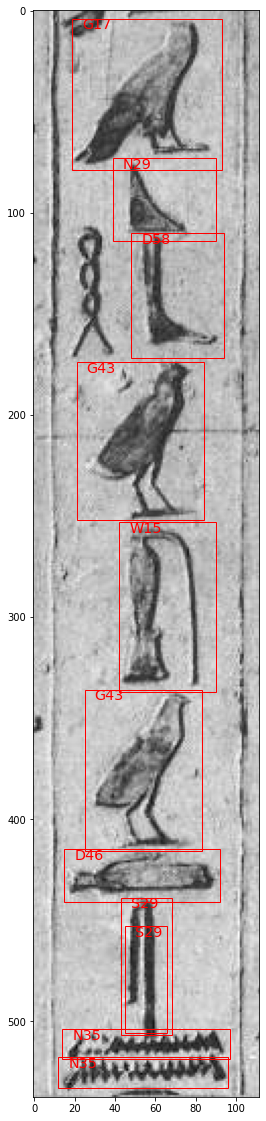

Zanlieziono następujące hierogliphy: 
S29 - 𓋴
G43 - 𓅱
N29 - 𓈎
D58 - 𓃀
W15 - 𓏁
N35 - 𓈖
G43 - 𓅱
D46 - 𓂧
N35 - 𓈖
G17 - 𓅓
S29 - 𓋴


In [8]:
find_glyphs(number = 11, img = example1, overlap_tolerance= 10) 

[============        ] 60%size conflic skippping hieroglyph 
[====================] 100%

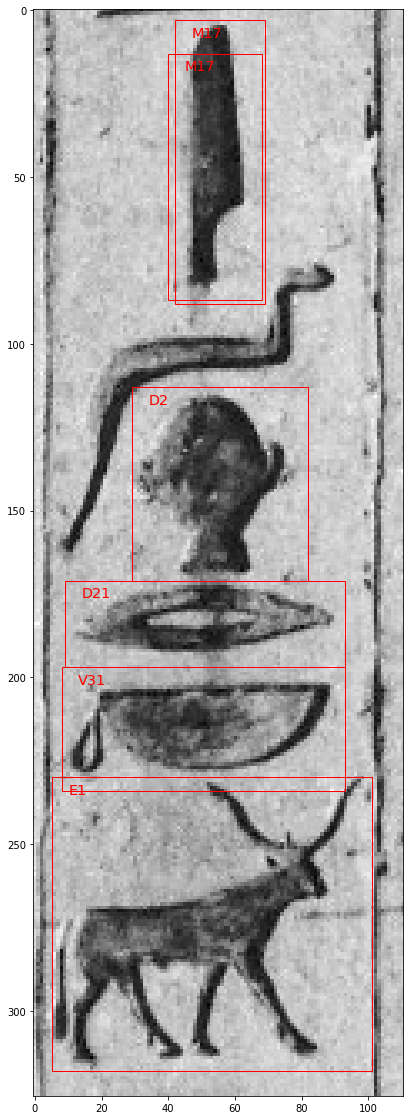

Zanlieziono następujące hierogliphy: 
M17 - 𓇋
D21 - 𓂋
E1 - 𓃒
V31 - 𓎡
D2 - 𓁷
M17 - 𓇋


In [9]:
find_glyphs(6, example2, 10) 

[============        ] 60%size conflic skippping hieroglyph 
[====================] 100%

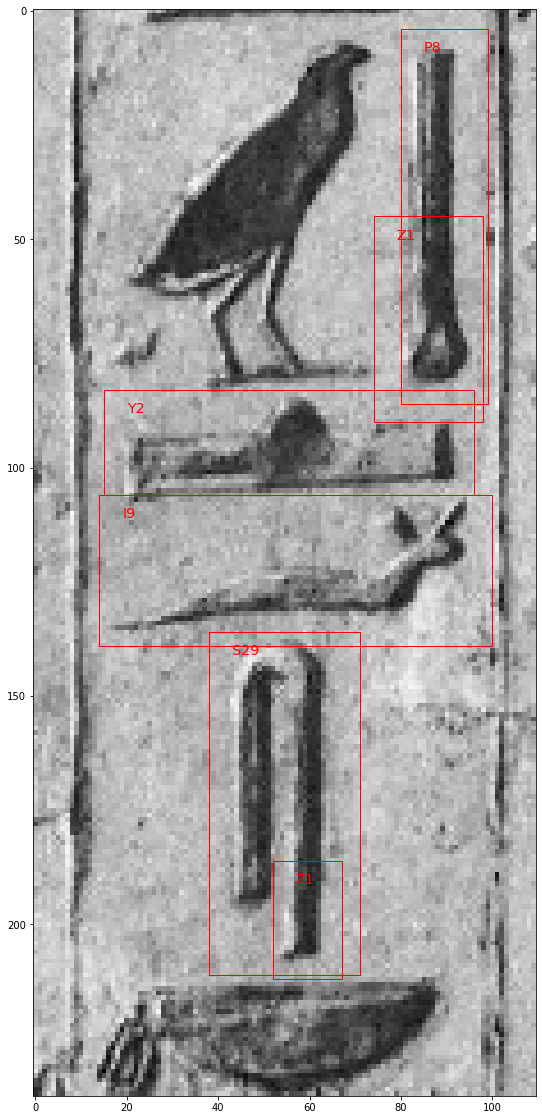

Zanlieziono następujące hierogliphy: 
P8 - 𓊤
S29 - 𓋴
Y2 - 𓏝
I9 - 𓆑
Z1 - 𓏤
Z1 - 𓏤


In [10]:
find_glyphs(6, example3, 20) 

[============        ] 60%size conflic skippping hieroglyph 
[====================] 100%

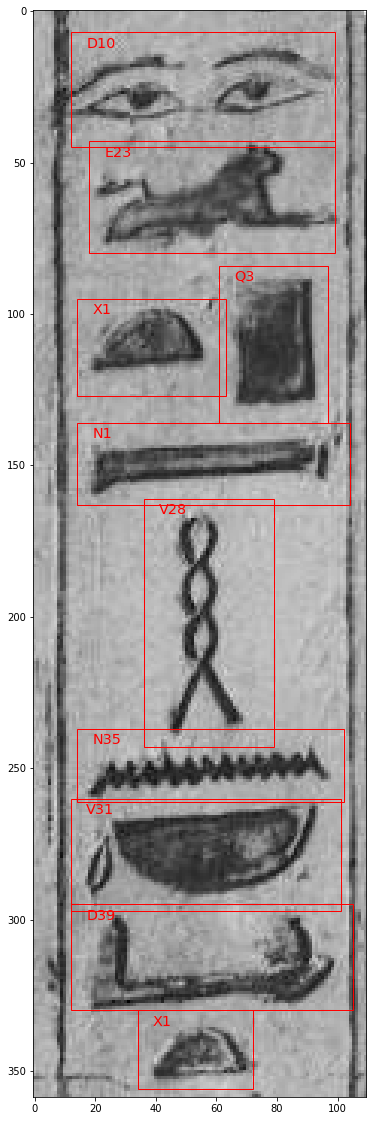

Zanlieziono następujące hierogliphy: 
Q3 - 𓊪
V31 - 𓎡
N1 - 𓇯
V28 - 𓎛
E23 - 𓃭
D39 - 𓂠
X1 - 𓏏
N35 - 𓈖
D10 - 𓂀
X1 - 𓏏


In [11]:
find_glyphs(10, example5, 10)

In [12]:
col[999].shape

(28, 64, 3)